In [1]:
library(tidyverse)
library(lme4)
library(mvtnorm)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
set.seed(2958195)

# Welcome to Multi-Level Models

Also-known as:

- hierarchical models,
- mixed-models, 
- random intercepts/slopes models, 
- varying intercepts/slopes models,
- random effect models
- partially pooled models
- and many, many more

Terminology is confusing, and sometimes contradictory. This is common in statistics, but even more so when we are talking about multi-level models.

Part of _Advanced Quantitative Methods_ 2021

Department of Peace and Conflict Research, Uppsala University

By **H. Hegre, E. Roed, M. Croicu, D. Randahl**

## Chapter 1 : The problem

### A real-world problem

Very frequently, data is **clustered**.

Examples:
- repeated observations of the same indivdual/subject, e.g. over space or time.
- repeated measurments over space or time.
- groupings of individuals into various group-level entities, group level properties


### Many kinds of clustering alternatives are possible.

Most frequently, we think of it in terms of time and space:

- repeated observations over time ➔ `time-series`
- repeated observations over groups (e.g. students in classes in schools in cities) ➔ `clustered data`
- repeated observations over space (e.g. cities in countries) ➔ `spatial clustering`

And finally:

- repeated cross-sections (groups) over time ➔ `panels` : a 2D data structure with two grouping axes
    - think of them as cross-sectional slices varying in time
    - or of time-series over a group of observations

**Panels are the most common data structure in Political Science and Conflict Research**

- example: `country` - `year` datasets 
- example: `event datasets` (e.g. UCDP GED) (events grouped into regions and collected over time)
- example: `survey data` (individuals grouped into administrative units, collected over time-waves)

Panels are also known as CSTS (cross-sectional time-series)

### Can you give me an example of panels?

Yeah, look below: It's the ViEWS country-month dataset!

Most other datasets in our field are panels. Other examples:
- VDEM
- QOG
- UCDP Country-year and Conflict-year datasets
- GDP, IMR etc. data

In [74]:
#Views is a good example! 

panel_example = read_csv('average_base_sb.csv')
panel_example %>% head(25)

Parsed with column specification:
cols(
  month_id = col_double(),
  country_id = col_double(),
  average_base_sb = col_double(),
  osa_cm_acled_base_fcast_test_logit_fullsample_sb = col_double(),
  osa_cm_acled_base_fcast_test_rf_downsampled_sb = col_double(),
  osa_cm_canon_base_fcast_test_logit_fullsample_sb = col_double(),
  osa_cm_canon_base_fcast_test_rf_downsampled_sb = col_double(),
  ds_cm_acled_base_fcast_test_sb = col_double(),
  ds_cm_canon_base_fcast_test_sb = col_double(),
  isonum = col_double(),
  isoab = col_character(),
  gwcode = col_double(),
  month = col_double(),
  year = col_double()
)



month_id,country_id,average_base_sb,osa_cm_acled_base_fcast_test_logit_fullsample_sb,osa_cm_acled_base_fcast_test_rf_downsampled_sb,osa_cm_canon_base_fcast_test_logit_fullsample_sb,osa_cm_canon_base_fcast_test_rf_downsampled_sb,ds_cm_acled_base_fcast_test_sb,ds_cm_canon_base_fcast_test_sb,isonum,isoab,gwcode,month,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
470,40,0.007712897,0.008297214,0.001408313,0.009378596,0.003366123,0.01252334,0.01130380,132,CPV,402,2,2019
470,41,0.161891897,0.117516445,0.351121944,0.117186425,0.212528677,0.08543438,0.08756351,384,CIV,437,2,2019
470,42,0.018543026,0.013644390,0.015937703,0.013729438,0.025806540,0.02319551,0.01894458,288,GHA,452,2,2019
470,43,0.015765029,0.015464096,0.007601327,0.013283676,0.022024818,0.01932311,0.01689314,430,LBR,450,2,2019
470,47,0.873601216,0.895928729,0.900540202,0.885557548,0.804893010,0.88013033,0.87455747,854,BFA,439,2,2019
470,48,0.340887793,0.312893313,0.608287145,0.328588075,0.505711164,0.13861099,0.15123607,324,GIN,438,2,2019
470,49,0.011415647,0.013690473,0.012444198,0.013163617,0.005003202,0.01112617,0.01306621,624,GNB,404,2,2019
470,50,0.937102860,0.932092908,0.999999995,0.926912310,0.999999994,0.88718737,0.87642459,466,MLI,432,2,2019
470,52,0.119225032,0.076624993,0.254548728,0.069541128,0.181003455,0.06386257,0.06976932,686,SEN,433,2,2019


# Why and When does it matter?

### First, some intuition:

Following image represents (Hegre, 2021) infant mortality over time and space.

What's happening below?

![imr](spag_imr.png)


Revision: 

- Remember the **i.i.d.** assumptions. How are we violating them?


- **Omitted variable bias**
   - a variable `Z` is correlated with both `X` and `Y`
   - estimates are biased; we have correlation of X with the error term (E(u<sub>i</sub>)≠0)
   
 
- In the context of panel data, if we have a variable `Z` that affects `Y~X` at group levels (if there is omitted variable bias not within a group, but BETWEEN groups), it's called **unobserved unit heterogeneity**. Is this to be expected? E.g. is infant mortality in 1995 affected by the country under study being "South Korea" vs. "Tanzania"?


- **Serial correlation**
    - any regression model based on above data will repeatidly add observations for the same unit, that are clearly correlated in time. 
    - This makes the model get repetitions of the same information, while believing (assuming) each piece of information is unique and independent.
    
**Let's explore with some simulated data.**

In [75]:
# For exemplification, we're going to work with some simulated data.
# The function is down below, you can use it for your own work. C&H's approach is just as good

df = create_data(obs_per_cluster=100,n_cluster=2,sd_slope=2,sd_int=5)
df<-df%>%mutate(color = case_when(
    cluster==1 ~ 'red',
    cluster==2 ~ 'blue' 
))

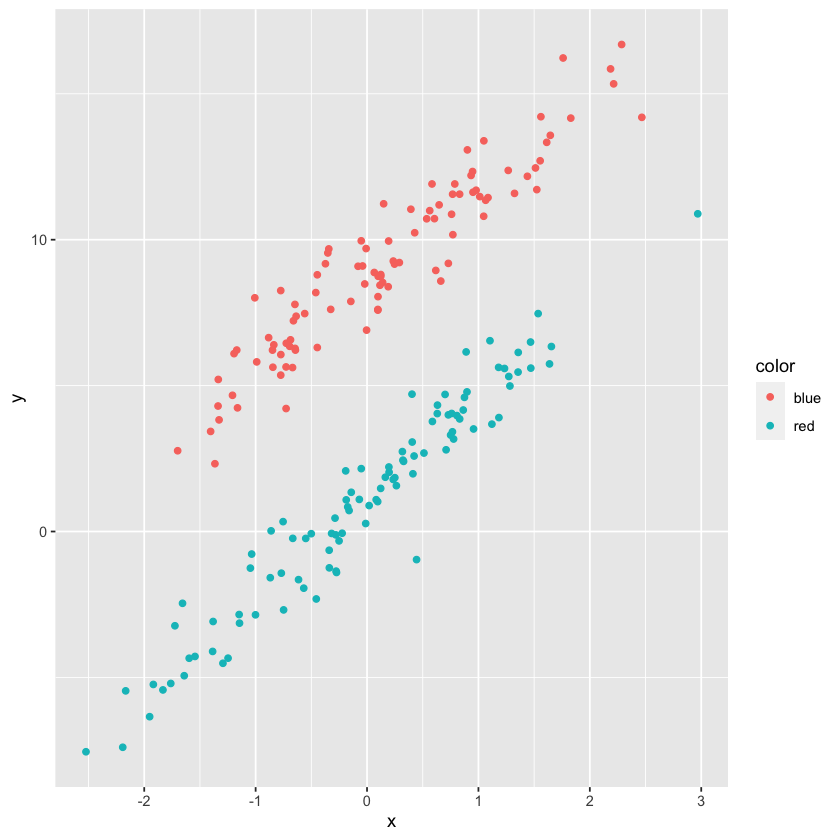

In [76]:
ggplot(df, aes(x=x, y=y, color=color)) + 
  geom_point()

What's happening if we try to run a classical, normal, OLS?

$Y_t=\alpha+\beta X+\epsilon_t$

We ignore the grouping altoghether and run a simple OLS:

## This is called full pooling

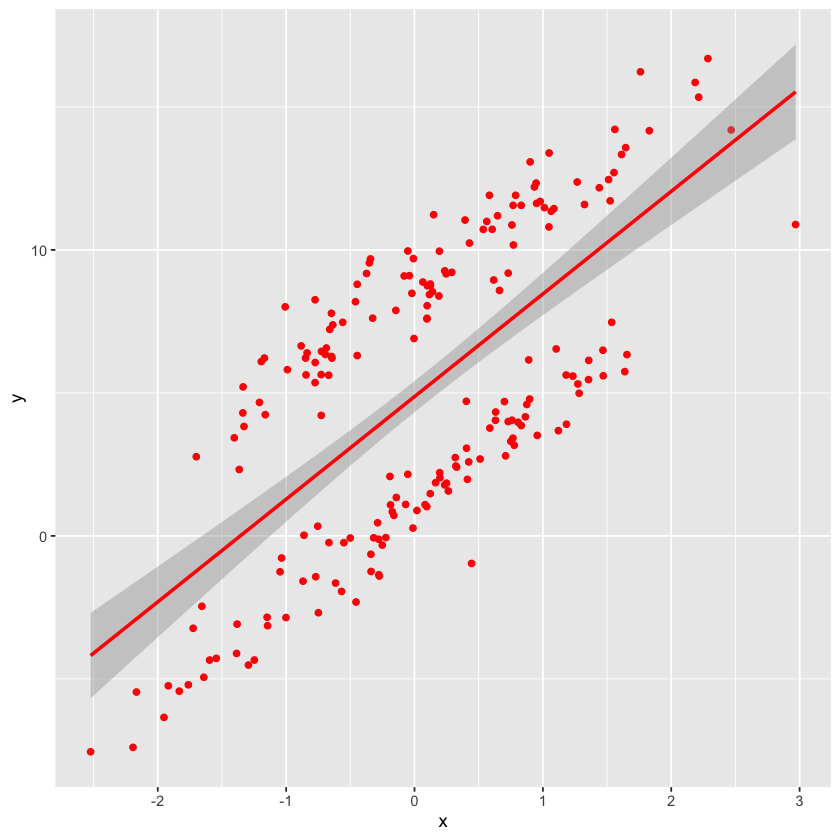

In [77]:
ggplot(df%>%filter(x,y), aes(x=x, y=y)) + 
  geom_point(color='red')+
  geom_smooth(method='lm', formula= y~x, color='red')

- Is $\beta$ biased?
- Is $\alpha$ (the intercept) reasonable?
- Can we forecast/predict using this line?
- What will the RMSE be? 
- Are the standard errors ok (gray shaded area)?

We can do better.

#### Naive idea :

- split the two groups into two samples and run two separate regressions (split sample regression).

Multiple issues : 
- even though there is one DGP, you are only showing the regression `N/k` data points instead of N, to retrieve that single DGP : low efficiency, so too large standard errors!
- you get multiple coefficients for each of the clustered units, but it is very difficult to get to _unobserved unit heterogeneity_. There are solutions around it (*do NOT just subtract the betas*) like bootstrapping, but not a good idea!. 

Is a good idea if some groups in the clustered data are actually produced by different DGPs, not actually by the same DGP affected by the clustering unit. See, for example _Croicu and Kreutz (2016)_ (Media reports in 1993 and 2008 are produced by different DGPs, since Internet access for sending reports was not available in 1993).

#### **How to think about it in practice :**

**Pooling** of the groups:

- 1. **Complete pooling**, i.e. ignore groupings altoghether.
    - Simple OLS, as per above.
    - We need to adjust standard errors for number of clusters. Multiple tools to do that.
    - Not a solution if the grouping influences the slope of the DGP!
    - Not a solution for predictive analytics (intercept ($\alpha$) will be an average of all group intercepts, thus meaningless)


- 2. **No pooling**, i.e. a less naive version of the split sample approach, modelling groups individually in order to estimate within group effects *only*:
    - **Fixed effects** model.
    - Intuition : Each group gets its own predictor in the model (usually as a dummy variable). The DV is affected by the IV in the group itself.
    - also known as "dummy variable regression/least squares" (DVLS).
    

- 3. **Partial pooling**:
    - Model groups as having a combination of pooling and no pooling.
    - Intuition : For each group, there is an overall effect transmitted from the whole panel level (complete pooling), but also an effect of the individual pool.
    - We model this by considering that the DV is created by a mixture of the effects (coefficients and errors) at the individual cluster and in the overall pool. We do this by estimating the model hierarchically, as a two-part regression model.
    - Also known as **random effects**, mixed effects model and many, many other names.

## No Pooling (Fixed Effects, FE)

$Y_{it} = \alpha_i + \beta X + \epsilon_{it}$

- Each group gets its own (dummy) predictor that captures the whole effect, over the entire time period, of the cluster (e.g. country, conflict).


- Each individual `i` has its own **time-invariant** intercept `i`.


- Each cluster gets its own **time-invariant** $\beta$ slope (since it's a dummy in the regression), indicating the overall time-invariant effect of that cluster on the DV.


- This also means the interpretation of the other variables $\beta$ changes - they become within-group (cluster) estimates. You cannot, using FE regression, study differences between groups (clusters), as all that effect will be absorbed by the FE!

- Estimated change in `Y` when `X` increases by one holding observation unit `i` constant.

Tip in practice : if your cluster variable (e.g. country id) is a factor, `R` will automatically turn it into as many dummy variables as needed, and run a FE regression. So `y~x+as.factor(country_id), ...` will save you a lot of effort.

In [78]:
fe_reg = lm(y~x+factor(cluster)-1,data=df)
summary(fe_reg)
# -1 because we want each group to get its own intercept, one per dummy. 
# This is telling R not to include an overall intercept to the formula.
#
# If you don't include -1, you will get the "regression intercept" as the intercept for the final dummy.
# And you will have to compute the intercept manually
# for each group by subtracting the "regression intercept" value from the dummy intercept by hand.
# Try it: dont_do_it = lm(y~x+factor(cluster),data=df); summary(dont_do_it)


Call:
lm(formula = y ~ x + factor(cluster) - 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5218 -0.6196 -0.0811  0.6312  2.5947 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
x                 3.21913    0.07062   45.58   <2e-16 ***
factor(cluster)1  1.12762    0.10029   11.24   <2e-16 ***
factor(cluster)2  8.65643    0.10089   85.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 197 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9814 
F-statistic:  3516 on 3 and 197 DF,  p-value: < 2.2e-16


In [79]:
fe_reg = lm(y~x+factor(cluster)-1,data=df)
#df$predlm = predict(fe_reg)
pred_in_sample = predict(fe_reg, interval = "confidence")
plot_data = cbind(df, pred_in_sample)

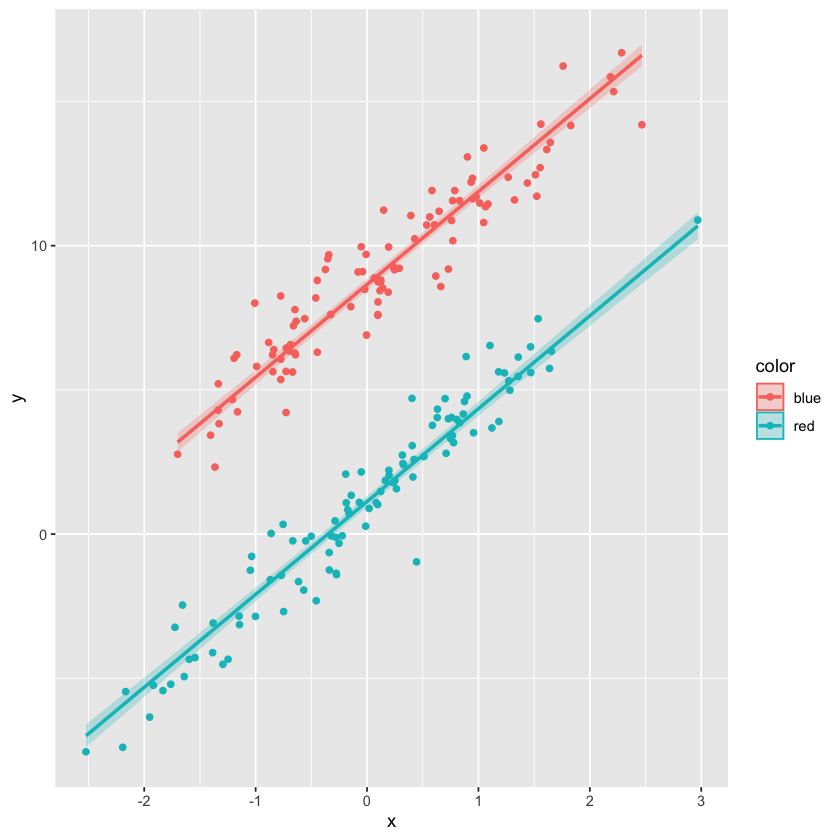

In [80]:
ggplot(plot_data, aes(x = x, y = y, color = color) ) +
     geom_point() +
     geom_ribbon( aes(ymin = lwr, ymax = upr, fill = color, color = NULL), alpha = .25) +
     geom_line(aes(y = fit), size = 1)

In [23]:
head(plot_data)

,y,x,cluster,color,fit,lwr,upr
,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2.4029493,0.32811560,1,red,2.1888839,2.00189008,2.4039501
2,-1.4038234,-0.27400217,1,red,0.2556198,0.06221365,0.4632041
3,5.5873310,1.23405801,1,red,5.1081685,4.86619027,5.3693405
4,0.3381422,-0.75365310,1,red,-1.2857703,-1.49086189,-1.0586915
5,5.7434496,1.63808692,1,red,6.4070594,6.12972870,6.7063278
6,9.0990463,-0.03982066,2,blue,8.5112699,8.32718085,8.7109837


## Partial Pooling (Random Effects, RE)


Two level model, with one stage estimating cluster level effects and another estimating pool level effects.

$Y_{t}=\alpha_{j[t]} + \beta X_{t} + \epsilon_{t}$

$\alpha_j = a + bU_{j} + \eta_{j}$

or in GLM form:

$Y_t \sim N(\alpha_{j[t]} + \beta X_t, \sigma^2_t ), \alpha_j \sim N(\mu_j,\sigma^2_{\alpha})$

- $U_{j}$ represent predictors at the group level
- $\eta_{j}$ represent error term at the group level



- Observe the intercept is $\alpha_{j[t]}$ : each $\alpha_{j}$ being estimated per group: This means we have *one intercept per group*!
- Looks like a no-pooling model, but with a key difference : $\alpha{j}$ is not independently estimated, but constrained to a common $\alpha$, by being drawn from a probability distribution: $\alpha_{j} \sim N(\mu_{\alpha},\sigma^2_{\alpha}), j=(1..J)$
- In effect, partial pooling models **mix**, in a weighted fashion, the information about in-group means and within group means.
    - as sample size of groups ➔ 0: multilevel estimates convege to the pool (general) average : like complete pooling 
    - as sample size of groups ➔ $\infty$: multilevel estimates converge to the group average : like no pooling
    - otherwise, estimates are in between the extremes: this is sometimes called **shrinkage**.

- Can be extended to a varying slope, varying intercept model, by doing the same thing for $\beta$

Yet another note on terminology: 
Fixed Effects and Random Effects usually refer to non-pooled and partially pooled models. Confusingly, however, sometimes, the global (non-varying, i.e. the common $\alpha$ we talked about above) estimates part of the partially pooled models are sometimes referred to as "fixed effects".

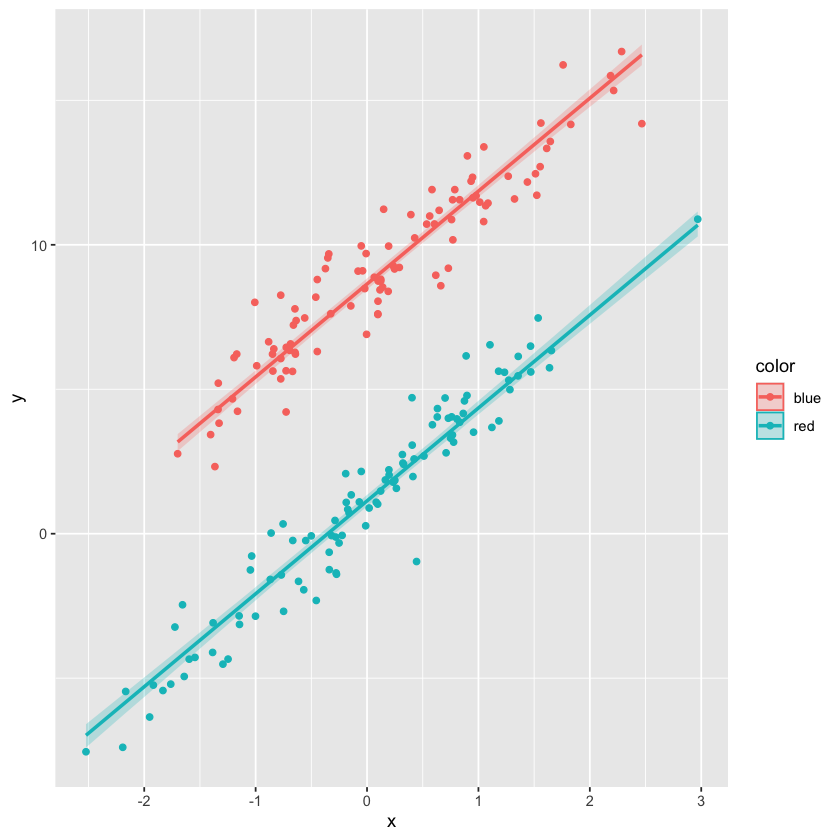

In [81]:
re_reg = lmer(y~x+(1|cluster),data=df)
pred_in_sample = predict(re_reg)

boot2 <- lme4::bootMer(re_reg, summ, nsim=250, use.u=TRUE, type="parametric")                   
PI.boot1 <- sumBoot(boot2)

re_reg = lmer(y~x+(1|cluster),data=df)
plot_data = df
plot_data = cbind(df, PI.boot1)
ggplot(plot_data, aes(x = x, y = y, color = color) ) +
     geom_point() +
     geom_ribbon( aes(ymin = lwr, ymax = upr, fill = color, color = NULL), alpha = .25) +
     geom_line(aes(y = fit), size = 1)

boundary (singular) fit: see ?isSingular



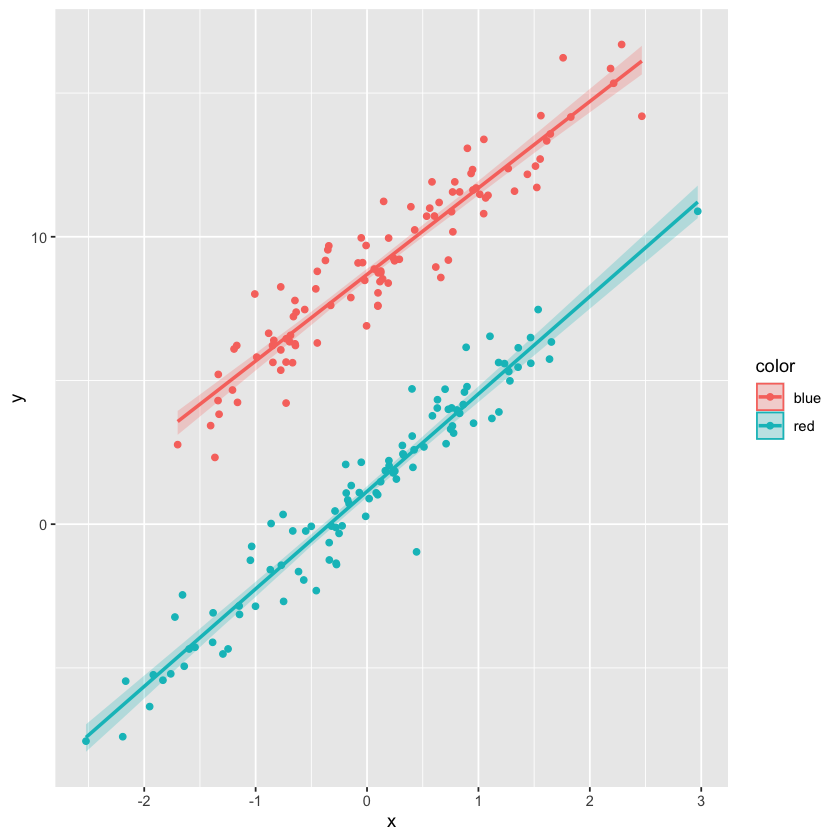

In [96]:
re_reg = lmer(y~x+(1+x|cluster),data=df)
pred_in_sample = predict(re_reg)

boot2 <- lme4::bootMer(re_reg, summ, nsim=250, use.u=TRUE, type="parametric")                   
PI.boot1 <- sumBoot(boot2)

re_reg = lmer(y~x+(1|cluster),data=df)
plot_data = df
plot_data = cbind(df, PI.boot1)
ggplot(plot_data, aes(x = x, y = y, color = color) ) +
     geom_point() +
     geom_ribbon( aes(ymin = lwr, ymax = upr, fill = color, color = NULL), alpha = .25) +
     geom_line(aes(y = fit), size = 1)

### Let's see them in more action!

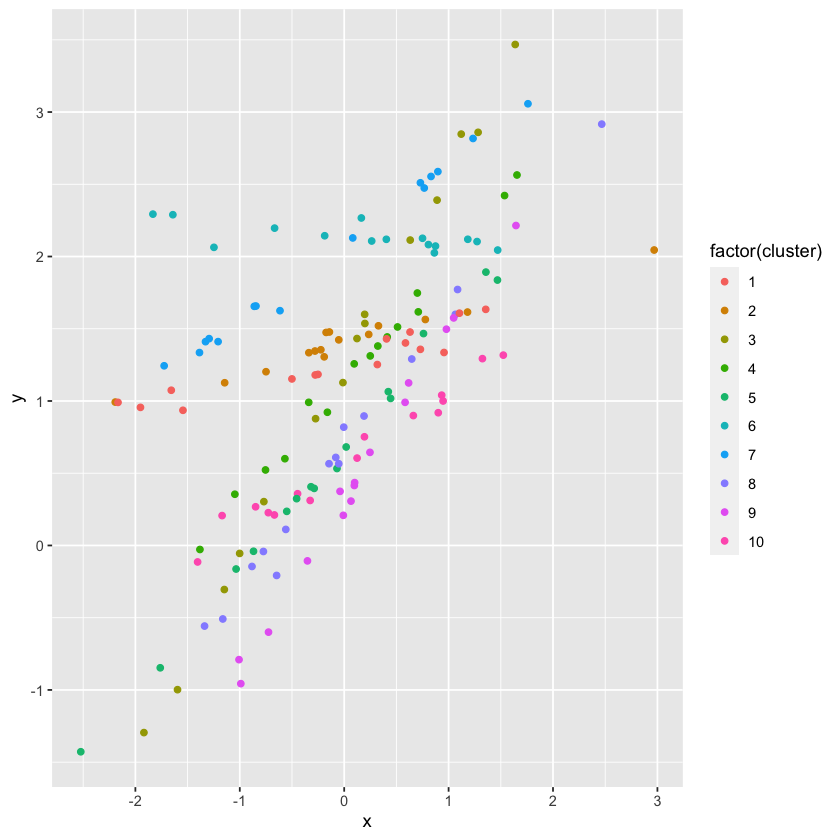

In [61]:
#df = create_data(n_cluster=10, obs_per_cluster=100, sigma=.1, sd_slope=.2)
df = create_data(n_cluster=10, obs_per_cluster=15, sigma=.075, sd_slope=.4)
#df = create_data(n_cluster=10, obs_per_cluster=100)
ggplot(df, aes(x=x, y=y, color=factor(cluster))) + 
  geom_point()

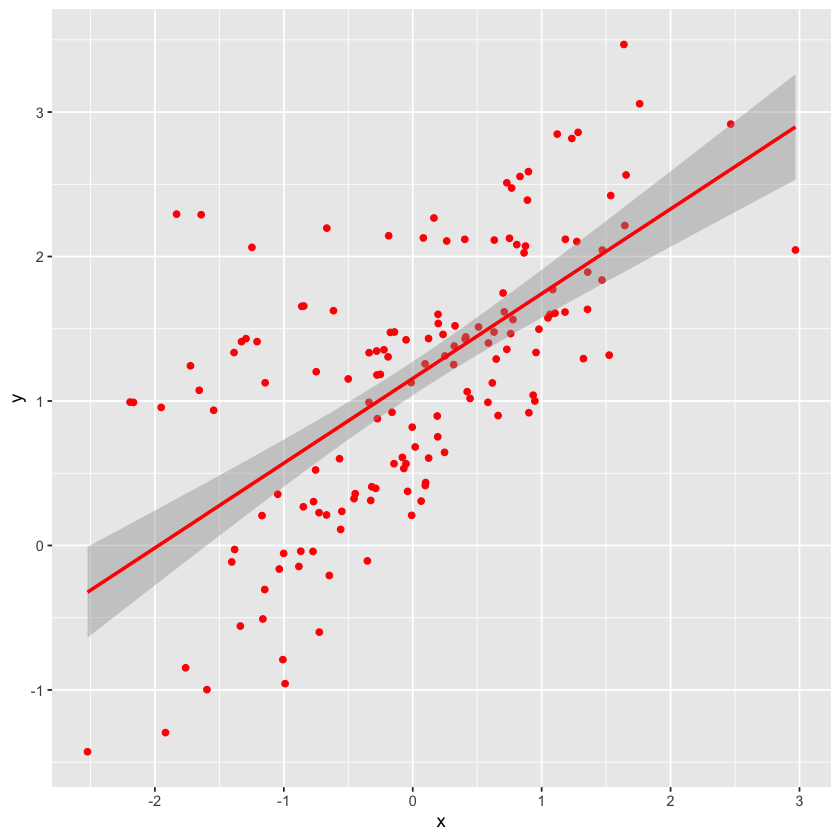

In [62]:
# Pooled

ggplot(df%>%filter(x,y), aes(x=x, y=y)) + 
  geom_point(color='red')+
  geom_smooth(method='lm', formula= y~x, color='red')

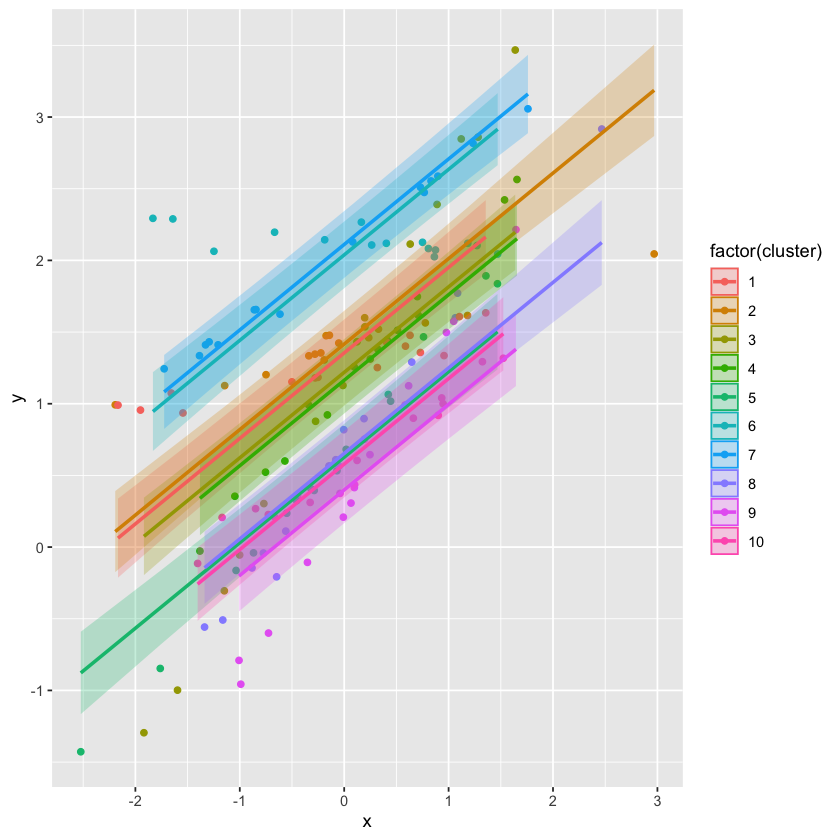

In [63]:
# Non-pooled

fe_reg = lm(y~x+factor(cluster)-1,data=df)
#df$predlm = predict(fe_reg)
pred_in_sample = predict(fe_reg, interval = "confidence")
plot_data = cbind(df, pred_in_sample)
ggplot(plot_data, aes(x = x, y = y, color = factor(cluster)) ) +
     geom_point() +
     geom_ribbon( aes(ymin = lwr, ymax = upr, fill = factor(cluster), color = NULL), alpha = .25) +
     geom_line(aes(y = fit), size = 1)

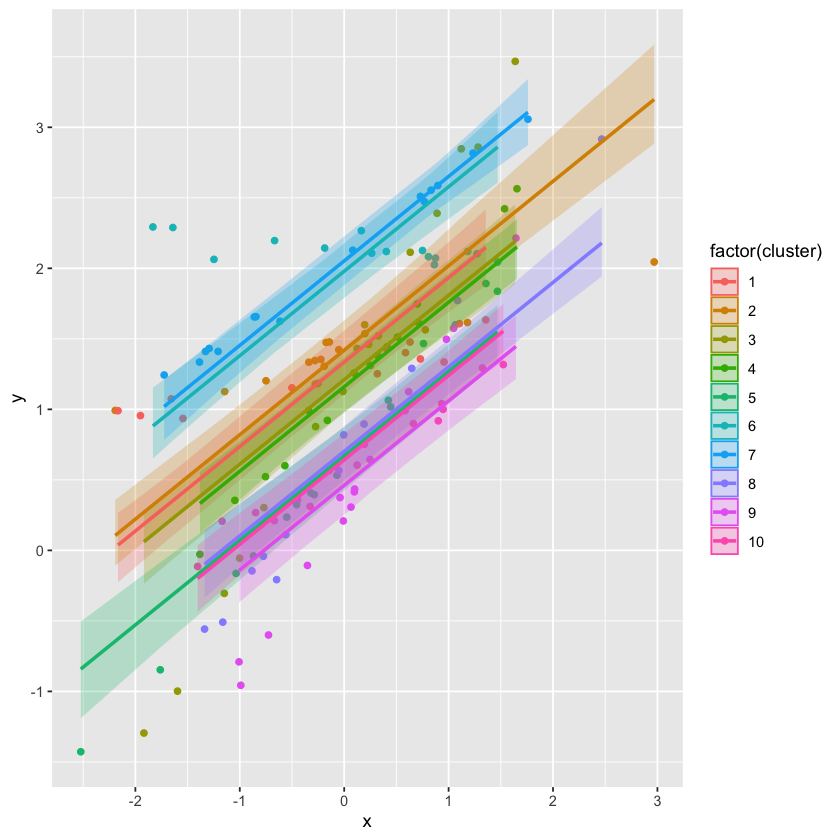

In [68]:
# Partially Pooled, varying intercept

re_reg = lmer(y~x+(1|cluster),data=df)
pred_in_sample = predict(re_reg)

boot2 <- lme4::bootMer(re_reg, summ, nsim=100, use.u=TRUE)
                          
PI.boot1 <- sumBoot(boot2)
                           
re_reg = lmer(y~x+(1|cluster),data=df)
plot_data2 = df
plot_data2 = cbind(df, PI.boot1)
ggplot(plot_data2, aes(x = x, y = y, color = factor(cluster)) ) +
     geom_point() +
     geom_ribbon( aes(ymin = lwr, ymax = upr, fill = factor(cluster), color = NULL), alpha = .25) +
     geom_line(aes(y = fit), size = 1)

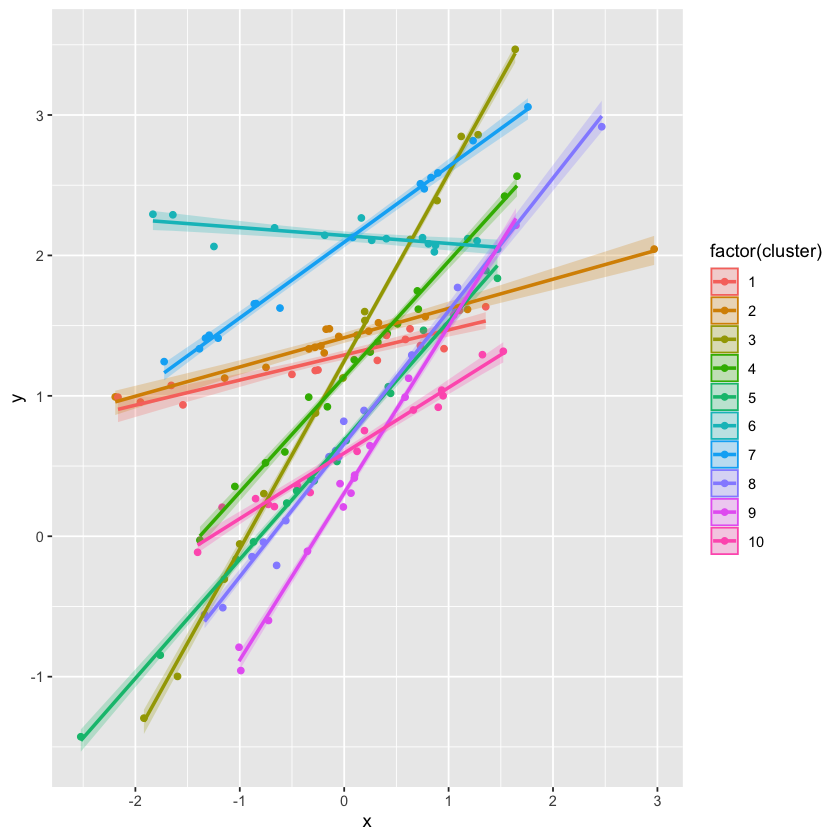

In [70]:
# Partially Pooled, varying slope

re_reg = lmer(y~x+(1+x|cluster),data=df)
pred_in_sample = predict(re_reg)

boot2 <- lme4::bootMer(re_reg, summ, nsim=100, use.u=TRUE, type="parametric")
                          
PI.boot1 <- sumBoot(boot2)
                           
re_reg = lmer(y~x+(1+x|cluster), data=df)
plot_data = df
plot_data = cbind(df, PI.boot1)
ggplot(plot_data, aes(x = x, y = y, color = factor(cluster)) ) +
     geom_point() +
     geom_ribbon( aes(ymin = lwr, ymax = upr, fill = factor(cluster), color = NULL), alpha = .25) +
     geom_line(aes(y = fit), size = 1)

In [10]:
PI.boot1

ERROR: Error in eval(expr, envir, enclos): object 'PI.boot1' not found


![shrinkage](https://m-clark.github.io/img/shrinkage/baseline.gif)

## Which model should I use?

Gelman & Hill (2007) suggest, due to above properties, *to always use a multi-level model (partial pooling)* if you have nested/clustered/grouped/panel data.

But, partially pooled models may be difficult to estimate computationally, especially if total number of observations is small.

#### Possible rules of thumb:

- Complete Pooling:
    - Groups are very similar with each-other (given covariates).
    - Very small total number of observations available. 
    - When forecasting for new groups
- No pooling:
    - Interest is in overall within group effect, few groups, many observations per group.
    - Main interest is variation over time within groups (e.g. over time, i.e. estimating causal effect), not between group effect.
    - Causal inference (within group effects)
- Partial pooling:
    - Interest is how effects vary by group or between groups, i.e. extract group effects from overall (pool) effects
    - Understand the structure of the effects (global versus local effects)
    - Natural to use when predictors are at both group level and individual level
    - Few observations per group and/or many groups
    - Relatively constant over time.
- None of these:
    - When interest is in forecasting ($\hat{Y}$ is your target) and not in estimating causal effects or correlation strengths ($\beta$), and the relation is not linear (or linkable to a linear), there are more flexible ways to model groups (tree-based models, like (Extreme) Gradient Boosted Trees, Random Forests etc.). Optional lecture slides may be uploaded, if interested!


Note that *all models above* can be extended to the GLM framework (logistic, count, survival models) with ease, in the same way pooled models work (using a link function). The main problem is computational, but easy to solve (if interested, see Gellman and Hill (1007), chapters 14-19. We won't delve into them.

# Memory in modelling

**Information from the past is frequently needed to inform the model.**

E.g. past economic development may inform the infant mortality ratio (think of a rapidly booming economy like the Gulf States in the 1970s after the discovery of oil; infrastructural transformation did not yet happen by e.g. 1975, even though their GDP exploded). 

**Frequently, processes take longer than one year (or the unit of time) to unfold.**

Typical solution: 

- **temporal lags**:

$Y_t = \alpha + \beta X_{[t-k]} + \delta X_{t-k} + \epsilon_t$

where k can be anything > 1.

Multiple lags can be included:

$Y_t = \alpha + \beta_{t-k} X_{[t-k]} + \beta_{t-k+1} X_{[t-k+1]} + ... + \beta_{t-1} X_{[t-1]} + \delta X_{t-k} + \epsilon_t$

Sometimes, temporal processes depend on past values of the dependent variable (e.g. the probability of conflict in a year is much higher in a country that had conflict last year). You can then include lags of the *dependent variable*, in exactly the same way as for the independent variables:

$Y_t = \alpha + \beta X_{[t-k]} + \gamma Y_{[t-k]} + \delta X_{t-k} + \epsilon_t$

- **decay functions** (optional):

Sometimes, information from the immediately previous time unit is more important than information from further back in time. For example, if a country had conflict 10 years ago, it doesn't add the same risk to having had a conflict last month.

Decay functions are usually fixed, and look like this:

$Y_t = \alpha + \beta f(X_{[t-k]}) + \delta X_{t-k} + \epsilon_t$

where:

$f(X_{[t-k]}) = X^{-\lambda*{(t-k)}}$

and $\lambda$ is a constant that you choose. The choice of the constant is usually done by determining when you want the information contributed by X to halve compared to $X_t$ (this is called a half-life).


**Memory can also be applied to space**, creating **spatial lags** and **spatial decay functions**, if, for example, information _leaks_ between neighbors (the state of a spatial neighbor influences the observation). This is common in conflict, where having a neighboring country in conflict affects your own risk of conflict. Spatial lags work in a very similar way with temporal lags, but have more dimensionality. 

Decay functions and lags can be estimated from data, using specialized models (e.g. "long short term memory" (LSTM), "convolutional neural networks" (CNN), "attention models" (CNN+attention), but the amount of data needed increases significantly.

I want to read more!

_Gelman and Hill (2007)_ is probably the best textbook on the matter, but can be a difficult read if you are just starting out. 

A good tutorial-oriented material is Michael Clark's material available here:
https://m-clark.github.io/mixed-models-with-R/

In [55]:
# A simulation helper function, that may aid you in your work. 

create_data <- function(  
  obs_per_cluster = 10,
  n_cluster = 100,
  intercept = 1,
  beta = .5,
  sigma = 1,
  sd_int = .5,
  sd_slope = .25,
  cor = 0,
  balanced = TRUE,
  seed = 888
  ) {
  
  # From M. Clark's approach. 
  # It's less flexible when compared to  
  set.seed(seed)

  cluster = rep(1:n_cluster, each = obs_per_cluster)
  N = n_cluster * obs_per_cluster
  x = rnorm(N)

  varmat = matrix(c(sd_int^2, cor, cor, sd_slope^2), 2, 2)
  
  #Between clusters
  re = mvtnorm::rmvnorm(n_cluster, sigma = varmat)
  colnames(re) = c('Intercept', 'x')
  
  #True DGP. This is a fully partially-pooled regression.
  #
  y = (intercept + re[cluster, 'Intercept']) + (beta + re[cluster, 'x'])*x + rnorm(N, sd = sigma)
  
  df = tibble(
    y,
    x,
    cluster
  )
  
  if (balanced < 0 | balanced > 1) {
    stop('Balanced should be a proportion to sample.')
  } else {
    df = sample_frac(df, balanced)
  }
  
  return (df)
}

## Helper functions for bootstrapping RE models
## These are needed by the package

summ <- function(.) {
  predict(., newdata=df, re.form=NULL)
}

sumBoot <- function(merBoot) {
  return(
    data.frame(fit = apply(merBoot$t, 2, function(x) as.numeric(mean(x, na.rm=TRUE))),
               lwr = apply(merBoot$t, 2, function(x) as.numeric(quantile(x, probs=.025, na.rm=TRUE))),
               upr = apply(merBoot$t, 2, function(x) as.numeric(quantile(x, probs=.975, na.rm=TRUE)))
    )
  )
}